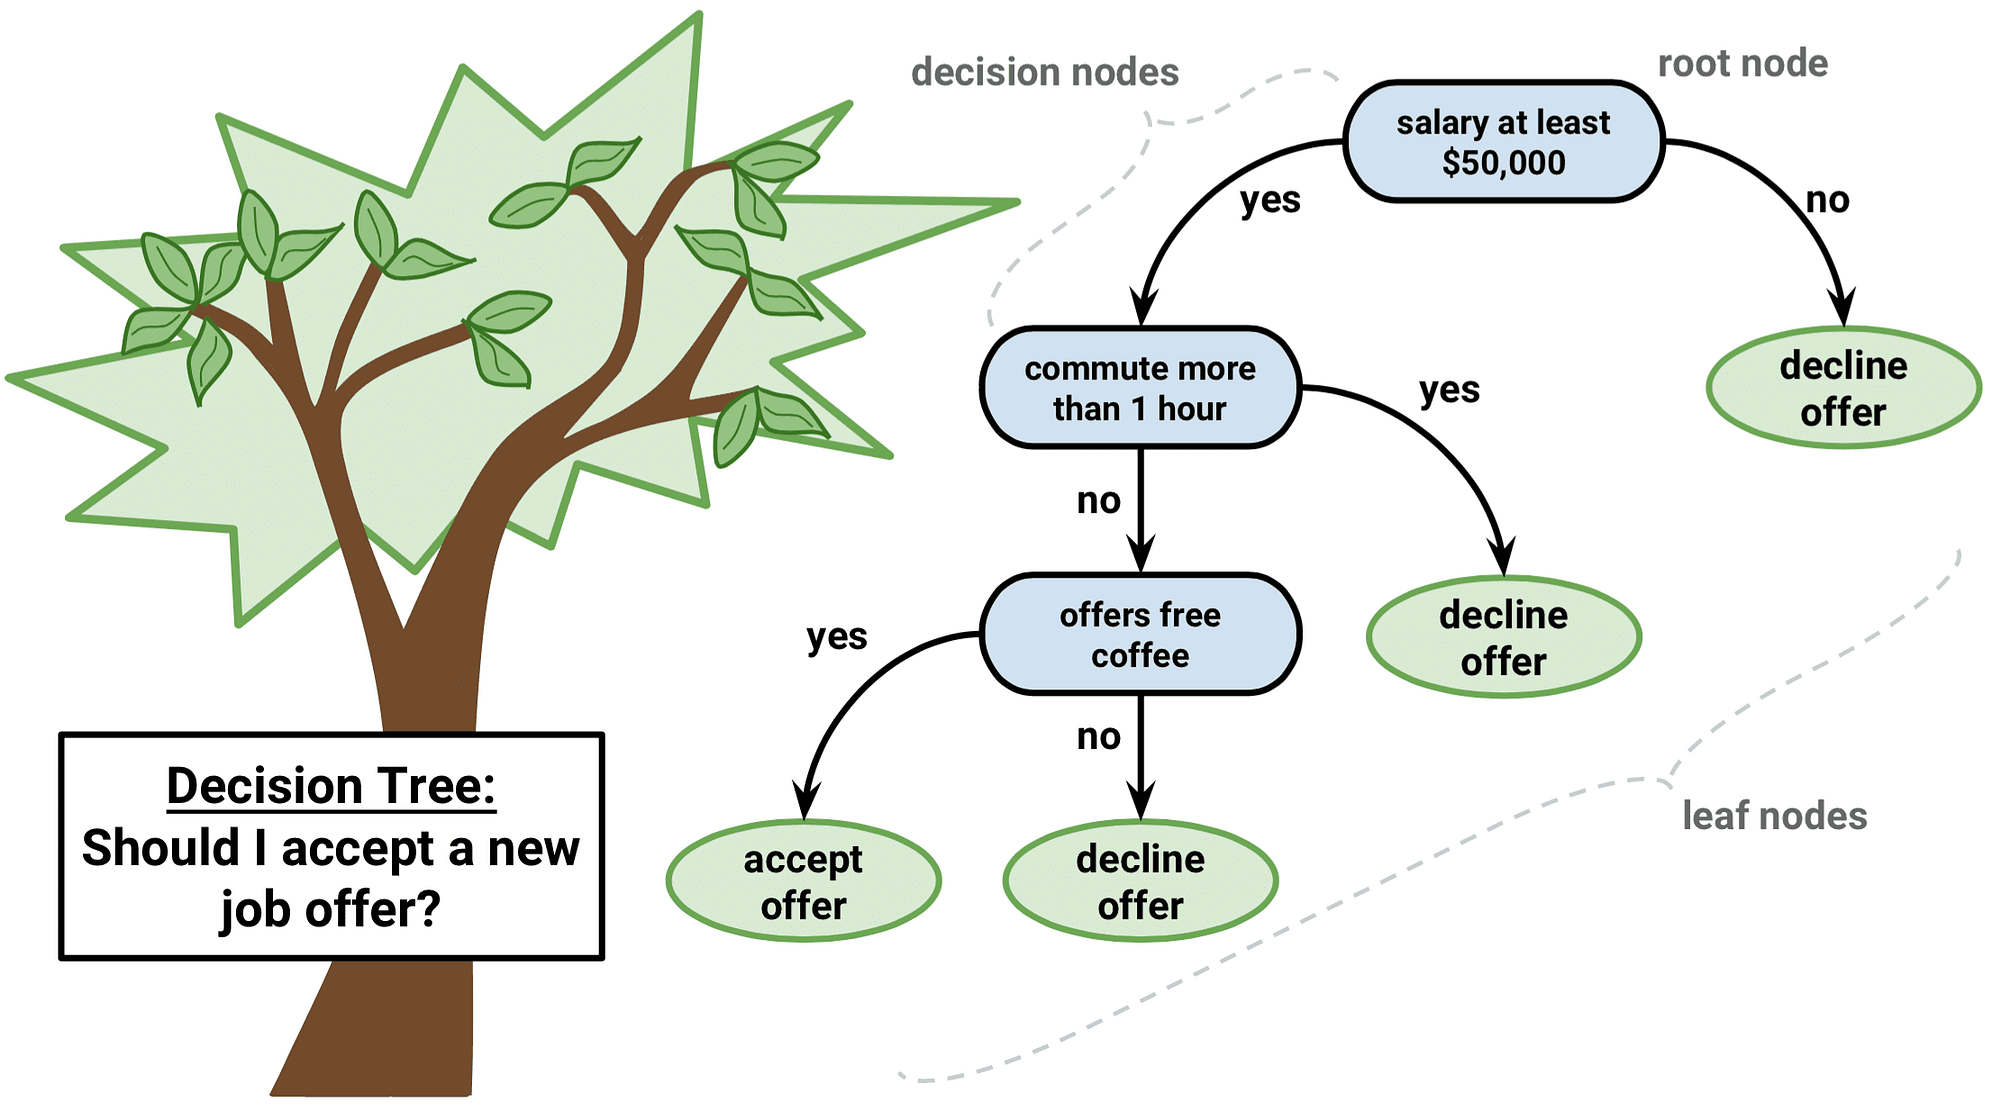

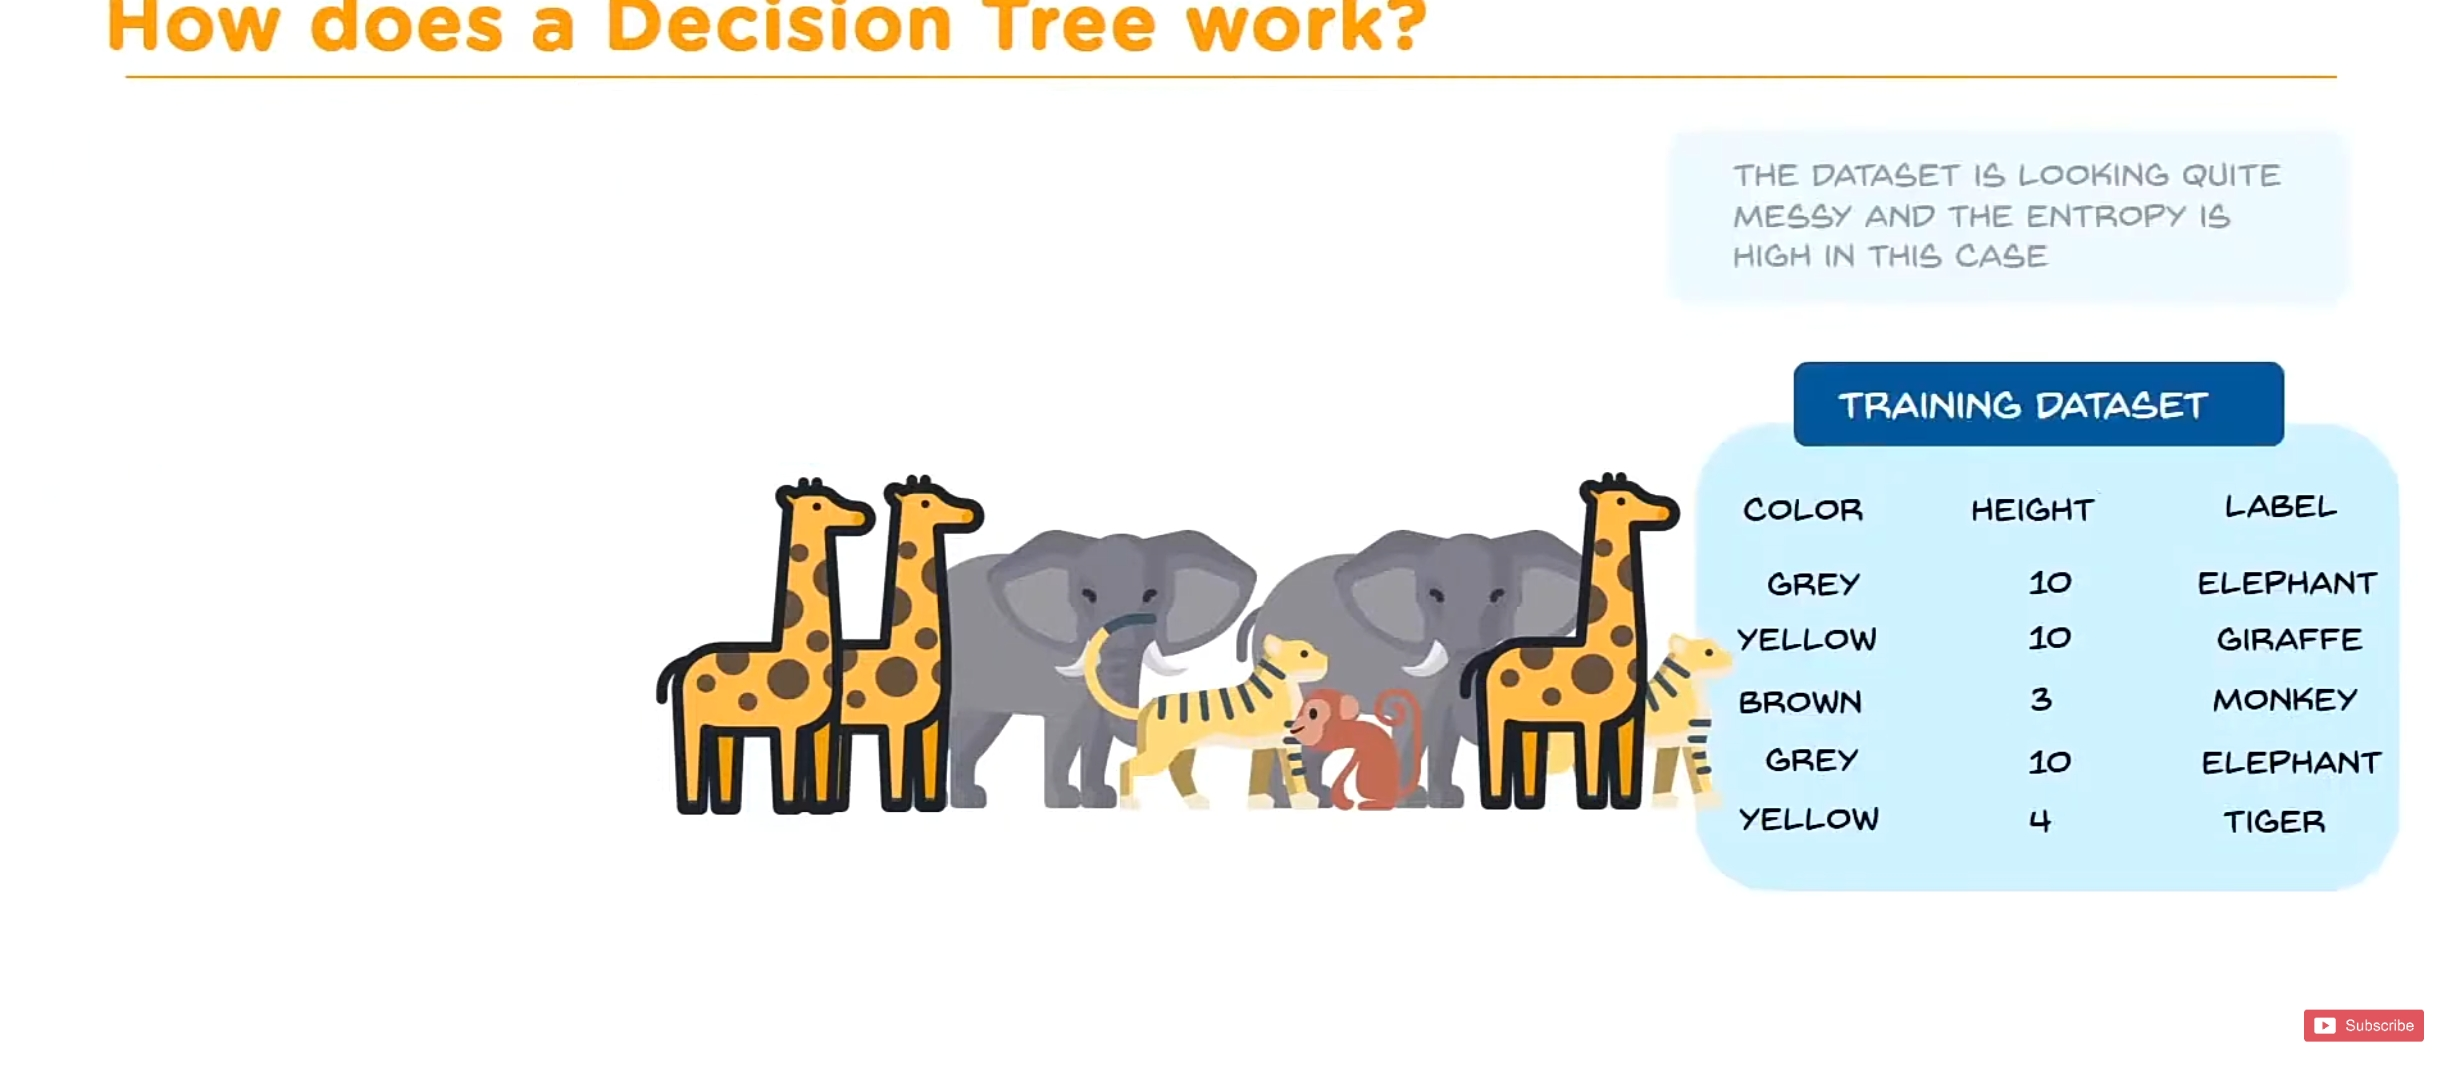

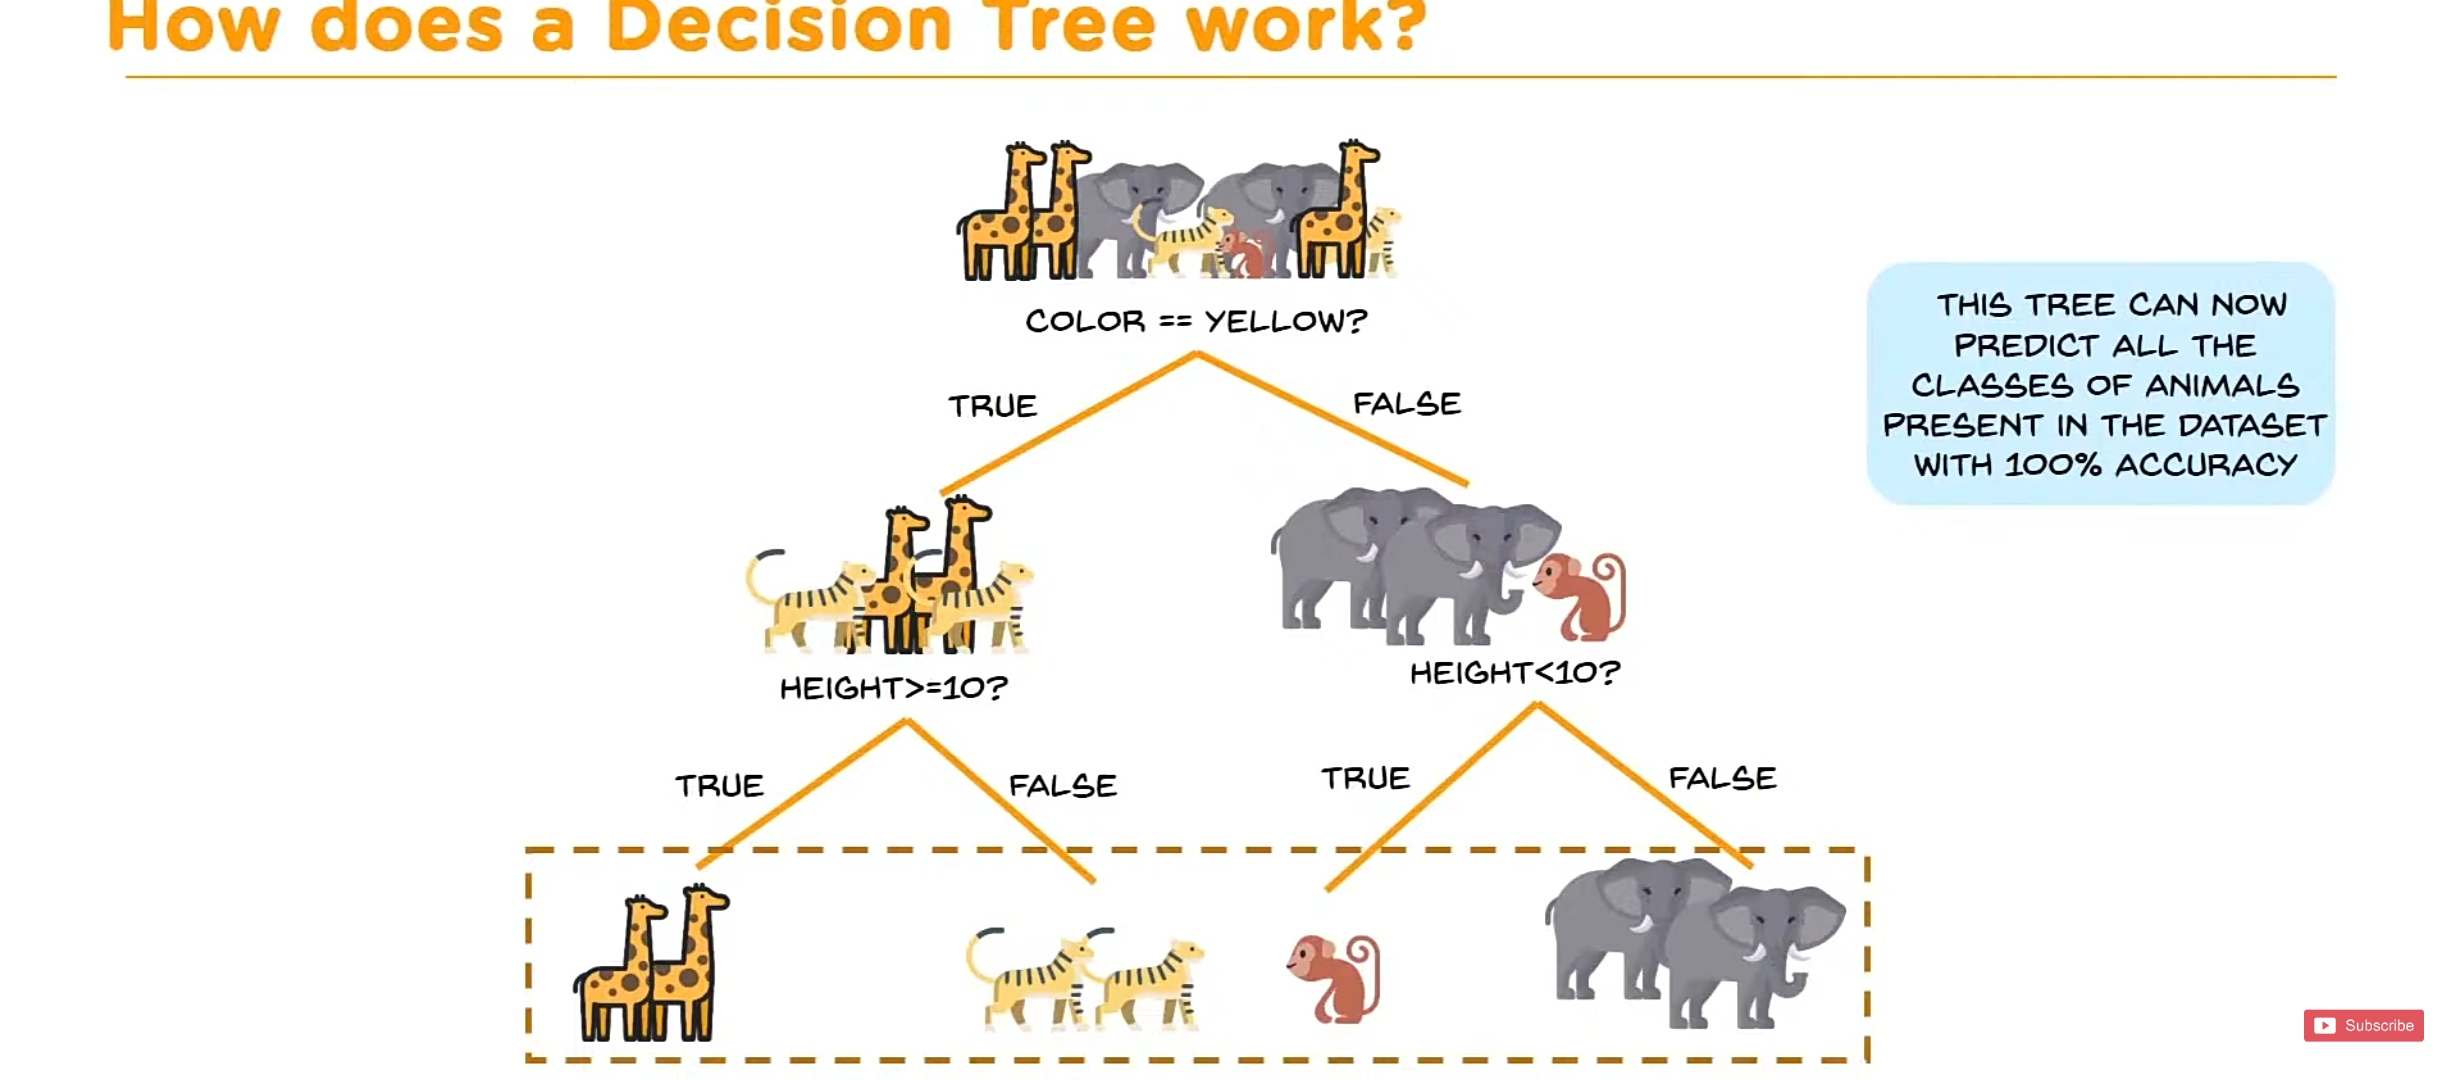

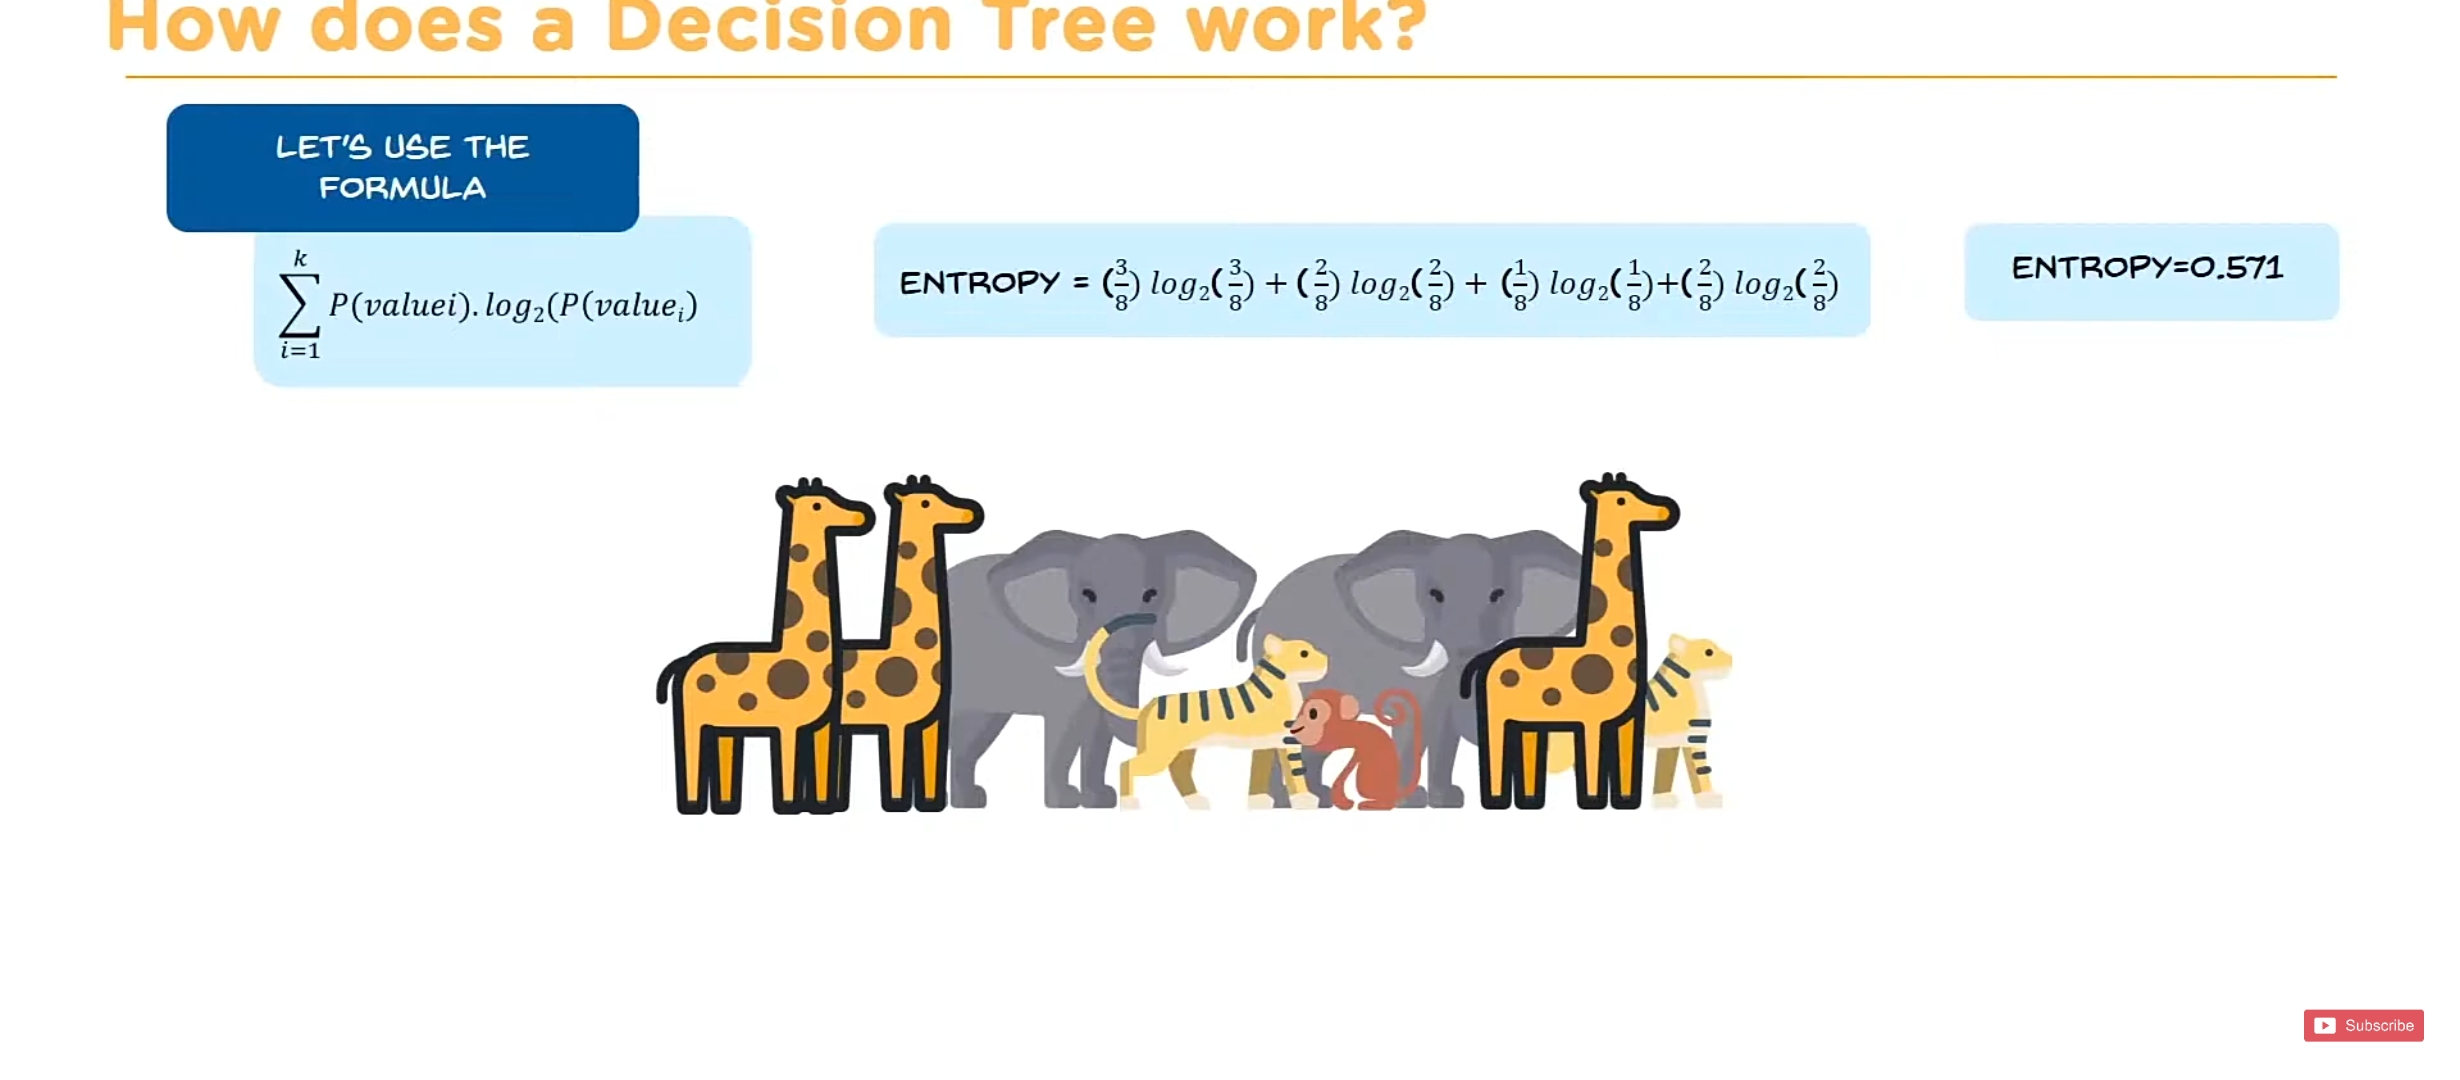

In [1]:
import numpy as np
from  collections import Counter

In [2]:
X = np.array([[1, 1,0], [3, 1, 0], [1, 4, 0], [2, 4, 1], [3, 3, 1], [5, 1, 1]])
y = np.array([0, 0, 0, 1, 1, 1])


In [3]:
# root        #                                                      0
# 1st feature #                   1             |                2               |                3              |                 5
# 2nd feature #   1    |    3    |    4    ||     1     |   3   |      4    ||     1    |    3    |     4   ||     1    |    3   |   4
# target/leaf #   0      1||  0    1 ||  0   1 ||  0     1 ||  0 1  ||  0    1  ||  0    1 ||  0    1 ||  0   1 ||   0   1 ||  0  1 || 0   1


In [4]:
max_depth = 5
min_node_size = 1

In [5]:
final_tree = {}

To find best value of best feature as per min gini index which split data into classes approximately same count or row
that means if there is 2  classes and 4 row then it will be splitted into 2 and 2 into 2 classes

Metric used to apply the split on the data is the Gini index which is calculated for each feature's single value
in order to find the best split on each step. This means there is room for improvement performance wise as this
process is O(n^2) and can be reduced to linear complexity.

In [6]:

# The Gini Index is a measure of impurity or diversity in a dataset, commonly used in Decision Trees and Random Forests. It calculates the probability of incorrectly classifying a randomly chosen element from the dataset.
# Gini Index Formula:
# The Gini Index is calculated using the following formula:
# Gini(D) = 1 - ∑(p^2)
# where:
# Gini(D) is the Gini Index of the dataset D.
# p is the proportion of each class in the dataset.
# How it works:
# Calculate the proportion of each class in the dataset.
# Square each proportion (p^2).
# Sum up the squared proportions.
# Subtract the sum from 1 to get the Gini Index.
# Interpretation:
# A Gini Index of:
# 0 indicates that all elements belong to the same class (perfectly pure).
# 1 indicates that the elements are evenly distributed among all classes (perfectly impure).
# A value between 0 and 1 indicates the level of impurity.
# Example:
# Suppose we have a dataset with two classes, A and B, with proportions:
# Class A: 0.4 (40%)
# Class B: 0.6 (60%)
# The Gini Index would be:
# Gini(D) = 1 - (0.4^2 + 0.6^2)
# = 1 - (0.16 + 0.36)
# = 1 - 0.52
# = 0.48
# This indicates that the dataset has a moderate level of impurity.

In [7]:
train_data = np.loadtxt("data.txt", delimiter=",")

In [8]:
train_data[:5]

array([[ 1.1107, -2.1079,  1.    ],
       [-0.5498,  0.0943,  1.    ],
       [-0.0382,  1.8829,  1.    ],
       [ 0.0555, -0.6139,  1.    ],
       [ 0.587 , -1.2067,  1.    ]])

In [9]:
train_y = np.loadtxt("target.txt")

In [10]:
train_y[:5]

array([1., 1., 1., 1., 1.])

In [11]:
train_data.shape

(90, 3)

In [12]:
len(train_data)

90

In [13]:
train_data[0]

array([ 1.1107, -2.1079,  1.    ])

In [14]:
len(train_data[0]) # len of first row of training data

3

In [15]:
no_of_features = len(train_data[0])-1 # 2 features 1 target column

In [16]:
no_of_features

2

In [17]:
gini_score = 1000
f_index = 0
f_value = 0

In [18]:
# for 1st iteration: 1st value as threshod
row = 0
column = 0 # feature index

value = train_data[row][column]  # threshold value

In [19]:
value

np.float64(1.1107)

In [20]:
train_data[:5]

array([[ 1.1107, -2.1079,  1.    ],
       [-0.5498,  0.0943,  1.    ],
       [-0.0382,  1.8829,  1.    ],
       [ 0.0555, -0.6139,  1.    ],
       [ 0.587 , -1.2067,  1.    ]])

In [21]:
instances = train_data.tolist()

In [22]:
instances[:5]

[[1.1107, -2.1079, 1.0],
 [-0.5498, 0.0943, 1.0],
 [-0.0382, 1.8829, 1.0],
 [0.0555, -0.6139, 1.0],
 [0.587, -1.2067, 1.0]]

apply split

In [23]:
left_child = []

right_child = []


In [24]:
if instances[0][0] < value:
    left_child.append(instances[0])
else:
    right_child.append(instances[0])

In [25]:
left_child

[]

In [26]:
right_child

[[1.1107, -2.1079, 1.0]]

In [27]:
for row in instances:
    if row[0] < value:
        left_child.append(row)
    else:
        right_child.append(row)

In [28]:
left_child

[[-0.5498, 0.0943, 1.0],
 [-0.0382, 1.8829, 1.0],
 [0.0555, -0.6139, 1.0],
 [0.587, -1.2067, 1.0],
 [0.5453, 0.2509, 1.0],
 [-0.3927, -0.622, 1.0],
 [-1.1905, -1.8785, 1.0],
 [-0.424, 0.7772, 1.0],
 [-0.7139, 1.5846, 1.0],
 [-0.8883, 2.1408, 1.0],
 [-0.6922, 0.0993, 1.0],
 [-0.7576, 0.7386, 1.0],
 [-1.1144, -1.7059, 1.0],
 [0.6612, -1.7296, 1.0],
 [-2.1381, -0.06, 1.0],
 [-1.4951, 0.0373, 1.0],
 [0.8029, 0.9739, 1.0],
 [0.8563, -1.4245, 1.0],
 [0.0397, -1.3799, 1.0],
 [-2.0015, 0.8355, 1.0],
 [-0.3428, -0.478, 1.0],
 [-0.8891, 1.2634, 1.0],
 [0.3832, -0.1189, 1.0],
 [0.4172, 1.0132, 1.0],
 [-0.8695, -0.7947, 1.0],
 [0.1166, 0.9435, 2.0],
 [0.6896, 3.916, 2.0],
 [0.929, 3.3611, 2.0],
 [1.0101, 1.8737, 2.0],
 [0.4212, 3.5322, 2.0],
 [0.338, 2.0947, 2.0],
 [-0.5332, 3.1421, 2.0],
 [0.338, 3.0801, 2.0],
 [0.0988, 1.9522, 2.0],
 [0.3688, 2.8904, 2.0],
 [0.8358, -2.3349, 3.0],
 [0.5365, -3.6555, 3.0],
 [0.8168, -3.1133, 3.0],
 [1.1039, -2.2261, 3.0],
 [0.6757, -2.5379, 3.0],
 [-0.2029, -3.84

In [29]:
right_child

[[1.1107, -2.1079, 1.0],
 [1.1107, -2.1079, 1.0],
 [1.435, 1.2334, 1.0],
 [1.3857, 1.2178, 1.0],
 [1.5607, 1.5862, 1.0],
 [1.2331, 1.7421, 1.0],
 [2.9737, 3.6438, 2.0],
 [3.768, 1.8649, 2.0],
 [1.2234, 2.9899, 2.0],
 [2.3009, 0.415, 2.0],
 [3.7693, 3.8027, 2.0],
 [1.945, 3.4208, 2.0],
 [5.0027, 2.787, 2.0],
 [2.0751, 2.2628, 2.0],
 [1.9113, 3.6777, 2.0],
 [2.3127, 3.913, 2.0],
 [1.9392, 2.3976, 2.0],
 [3.1218, 2.5495, 2.0],
 [1.7032, 1.1509, 2.0],
 [2.7686, 0.9402, 2.0],
 [2.1696, 2.9285, 2.0],
 [3.6886, 0.4054, 2.0],
 [2.6315, 3.1962, 2.0],
 [1.403, 1.1841, 2.0],
 [2.8739, 2.7777, 2.0],
 [1.1254, 3.2404, 2.0],
 [1.4758, -1.6387, 3.0],
 [1.9289, -1.8191, 3.0],
 [2.5741, -1.3213, 3.0],
 [2.1917, -1.2852, 3.0],
 [2.6863, -1.8834, 3.0],
 [3.1102, -0.4854, 3.0],
 [3.7073, -0.6466, 3.0],
 [3.6394, -0.4097, 3.0],
 [2.9295, -0.3819, 3.0],
 [1.3432, -1.7717, 3.0],
 [1.3754, -2.2236, 3.0],
 [2.421, -1.9788, 3.0],
 [1.9552, -1.553, 3.0],
 [2.4943, -1.8116, 3.0],
 [1.9761, -1.0664, 3.0],
 [2.2076

In [30]:
left_child1 = []
right_child1 = []

In [31]:
for row in left_child:
    if row[0] < left_child[0][0]:
        left_child1.append(row)
    else:
        right_child1.append(row)

In [32]:
left_child1

[[-1.1905, -1.8785, 1.0],
 [-0.7139, 1.5846, 1.0],
 [-0.8883, 2.1408, 1.0],
 [-0.6922, 0.0993, 1.0],
 [-0.7576, 0.7386, 1.0],
 [-1.1144, -1.7059, 1.0],
 [-2.1381, -0.06, 1.0],
 [-1.4951, 0.0373, 1.0],
 [-2.0015, 0.8355, 1.0],
 [-0.8891, 1.2634, 1.0],
 [-0.8695, -0.7947, 1.0],
 [-0.8198, -5.4449, 3.0]]

In [33]:
right_child1

[[-0.5498, 0.0943, 1.0],
 [-0.0382, 1.8829, 1.0],
 [0.0555, -0.6139, 1.0],
 [0.587, -1.2067, 1.0],
 [0.5453, 0.2509, 1.0],
 [-0.3927, -0.622, 1.0],
 [-0.424, 0.7772, 1.0],
 [0.6612, -1.7296, 1.0],
 [0.8029, 0.9739, 1.0],
 [0.8563, -1.4245, 1.0],
 [0.0397, -1.3799, 1.0],
 [-0.3428, -0.478, 1.0],
 [0.3832, -0.1189, 1.0],
 [0.4172, 1.0132, 1.0],
 [0.1166, 0.9435, 2.0],
 [0.6896, 3.916, 2.0],
 [0.929, 3.3611, 2.0],
 [1.0101, 1.8737, 2.0],
 [0.4212, 3.5322, 2.0],
 [0.338, 2.0947, 2.0],
 [-0.5332, 3.1421, 2.0],
 [0.338, 3.0801, 2.0],
 [0.0988, 1.9522, 2.0],
 [0.3688, 2.8904, 2.0],
 [0.8358, -2.3349, 3.0],
 [0.5365, -3.6555, 3.0],
 [0.8168, -3.1133, 3.0],
 [1.1039, -2.2261, 3.0],
 [0.6757, -2.5379, 3.0],
 [-0.2029, -3.842, 3.0],
 [1.0335, -2.6042, 3.0],
 [0.9638, -2.9449, 3.0],
 [0.3505, -3.1887, 3.0],
 [0.5994, -3.0513, 3.0]]

In [34]:
len(train_data)

90

In [35]:
len(left_child) # 12 + 34

46

In [36]:
len(right_child)

45

In [37]:
len(left_child1) # child of left child

12

In [38]:
len(right_child1) # child of left child

34

In [39]:
left_child = np.array(left_child)
right_child = np.array(right_child)

In [40]:
children = [left_child, right_child]

In [84]:
def apply_split(feature_index, threshold, data):
    """
        This function splits the dataset on certain value of a feature
        Parameters:
        feature_index (int): Index of selected feature
        
        threshold : Value of the feature split point
        

        Returns:
        np.array: Two new groups of split instances

    """
    instances = data.tolist()
    left_child = []
    right_child = []
    for row in instances:
        if row[feature_index] < threshold:
            left_child.append(row)
        else:
            right_child.append(row)
    left_child = np.array(left_child)
    right_child = np.array(right_child)
    return left_child, right_child

calculate gini index

In [42]:
n = len(left_child) + len(right_child)

In [43]:
n

91

In [44]:
m1 = len(left_child)

In [45]:
m1

46

In [46]:
# Create a list with each instance's class value
y1 = []
for row in left_child:
    y1.append(row[-1])

In [47]:
y1

[np.float64(1.0),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(2.0),
 np.float64(2.0),
 np.float64(2.0),
 np.float64(2.0),
 np.float64(2.0),
 np.float64(2.0),
 np.float64(2.0),
 np.float64(2.0),
 np.float64(2.0),
 np.float64(2.0),
 np.float64(3.0),
 np.float64(3.0),
 np.float64(3.0),
 np.float64(3.0),
 np.float64(3.0),
 np.float64(3.0),
 np.float64(3.0),
 np.float64(3.0),
 np.float64(3.0),
 np.float64(3.0),
 np.float64(3.0)]

In [48]:
freq1 = Counter(y1).values()

In [49]:
freq1 # for class 1 , 2 , 3

dict_values([25, 10, 11])

In [50]:
# gini of this first node or value
node_gini1 = 1
for i in freq1:
    node_gini1 = node_gini1 - (i/m1)**2  # 1 - (25/46)^2 - (10/46)^2 - (11/46)^2


In [51]:
node_gini1 # if all are in same class gin 0 gini increse with increaed impurity , 
# 0 indicates that all elements belong to the same class (perfectly pure).
# 1 indicates that the elements are evenly distributed among all classes (perfectly impure).
# A value between 0 and 1 indicates the level of impurity.

0.6001890359168242

In [52]:
gini = 0

In [53]:
gini = gini + (m1 / n) * node_gini1 

In [54]:
gini # calculate node_gini for right child then calculate gini finally add thid 2 gini to get total gini

0.303392259913999

In [85]:
# This function calculates the gini index of a split in the dataset
# Firstly the gini score is calculated for each child node and the resulting Gini is 
# the weighted sum of gini_left and gini_right

def calculate_gini( child_nodes):
        """
            This function calculates the gini index of a split in the dataset
            Firstly the gini score is calculated for each child note and the resulting Gini is the weighted sum of gini_left and gini_right

            Parameters:
            child_nodes (list of np arrays): The two groups of instances resulting from the split

            Returns:
            float:Gini index of the split 

        """
        n = 0
        # Calculate number of all instances of the parent node
        for node in child_nodes:
            n = n + len(node)
        gini = 0
        # Calculate gini index for each child node
        for node in child_nodes:
            m = len(node)

            # Avoid division by zero if a child node is empty
            if m == 0:
                continue

            # Create a list with each instance's class value
            y = []
            for row in node:
                y.append(row[-1])

            # Count the frequency for each class value
            freq = Counter(y).values()
            node_gini = 1
            for i in freq:
                node_gini = node_gini - (i / m) ** 2
            gini = gini + (m / n) * node_gini
        return gini

In [56]:
gini_score = 1000

if gini < gini_score:
    gini_score = gini
    f_index = 0
    f_value = value
    child_nodes = [left_child, right_child]

# print("Chosen feature is {} and its value is {} with gini index {}".format(f_index,f_value,gini_score))
node = {"feature": f_index, "value": f_value, "children": child_nodes}

In [57]:
node

{'feature': 0,
 'value': np.float64(1.1107),
 'children': [array([[-0.5498,  0.0943,  1.    ],
         [-0.0382,  1.8829,  1.    ],
         [ 0.0555, -0.6139,  1.    ],
         [ 0.587 , -1.2067,  1.    ],
         [ 0.5453,  0.2509,  1.    ],
         [-0.3927, -0.622 ,  1.    ],
         [-1.1905, -1.8785,  1.    ],
         [-0.424 ,  0.7772,  1.    ],
         [-0.7139,  1.5846,  1.    ],
         [-0.8883,  2.1408,  1.    ],
         [-0.6922,  0.0993,  1.    ],
         [-0.7576,  0.7386,  1.    ],
         [-1.1144, -1.7059,  1.    ],
         [ 0.6612, -1.7296,  1.    ],
         [-2.1381, -0.06  ,  1.    ],
         [-1.4951,  0.0373,  1.    ],
         [ 0.8029,  0.9739,  1.    ],
         [ 0.8563, -1.4245,  1.    ],
         [ 0.0397, -1.3799,  1.    ],
         [-2.0015,  0.8355,  1.    ],
         [-0.3428, -0.478 ,  1.    ],
         [-0.8891,  1.2634,  1.    ],
         [ 0.3832, -0.1189,  1.    ],
         [ 0.4172,  1.0132,  1.    ],
         [-0.8695, -0.7947,  1.

In [86]:
def find_best_split( data):
        """
            This function finds the best split on the dataset on each iteration of the algorithm by evaluating
            all possible splits and applying the one with the minimum Gini index.
            Parameters:
            data: Dataset

            Returns node (dict): Dictionary with the index of the splitting feature and its value and the two child nodes

        """

        num_of_features = len(data[0]) - 1
        gini_score = 1000
        f_index = 0
        f_value = 0
        # Iterate through each feature and find minimum gini score
        for column in range(num_of_features):
            for row in data:
                value = row[column]
                l, r = apply_split(column, value, data)
                children = [l, r]
                score = calculate_gini(children)
                # print("Candidate split feature X{} < {} with Gini score {}".format(column,value,score))
                if score < gini_score:
                    gini_score = score
                    f_index = column
                    f_value = value
                    child_nodes = children
        # print("Chosen feature is {} and its value is {} with gini index {}".format(f_index,f_value,gini_score))
        node = {"feature": f_index, "value": f_value, "children": child_nodes}
        return node


now create tree from this node as parent or root which has depth 1

In [59]:
tree = node
depth = 1

In [60]:
l, r = node['children']

In [61]:
l.shape

(46, 3)

In [62]:
l.size # 46*3

138

In [63]:
r[0][-1]

np.float64(1.0)

In [64]:

if l.size == 0:
    yr = []
    for row in r:
        yr.append(row[-1]) # class or target
    occurence_count = Counter(yr)
    occurence_count.most_common(1)[0][0]
    

In [65]:
yr = []
for row in r:
    yr.append(row[-1]) # class or target
occurence_count = Counter(yr)
print(occurence_count)
c_value = occurence_count.most_common(1)[0][0] # most frequent class or target

Counter({np.float64(2.0): 20, np.float64(3.0): 19, np.float64(1.0): 6})


In [66]:
# del node["children"]

In [67]:
node

{'feature': 0,
 'value': np.float64(1.1107),
 'children': [array([[-0.5498,  0.0943,  1.    ],
         [-0.0382,  1.8829,  1.    ],
         [ 0.0555, -0.6139,  1.    ],
         [ 0.587 , -1.2067,  1.    ],
         [ 0.5453,  0.2509,  1.    ],
         [-0.3927, -0.622 ,  1.    ],
         [-1.1905, -1.8785,  1.    ],
         [-0.424 ,  0.7772,  1.    ],
         [-0.7139,  1.5846,  1.    ],
         [-0.8883,  2.1408,  1.    ],
         [-0.6922,  0.0993,  1.    ],
         [-0.7576,  0.7386,  1.    ],
         [-1.1144, -1.7059,  1.    ],
         [ 0.6612, -1.7296,  1.    ],
         [-2.1381, -0.06  ,  1.    ],
         [-1.4951,  0.0373,  1.    ],
         [ 0.8029,  0.9739,  1.    ],
         [ 0.8563, -1.4245,  1.    ],
         [ 0.0397, -1.3799,  1.    ],
         [-2.0015,  0.8355,  1.    ],
         [-0.3428, -0.478 ,  1.    ],
         [-0.8891,  1.2634,  1.    ],
         [ 0.3832, -0.1189,  1.    ],
         [ 0.4172,  1.0132,  1.    ],
         [-0.8695, -0.7947,  1.

In [68]:
node["left"] = node["right"] = {"class_value": c_value, "depth": depth}

In [69]:
node

{'feature': 0,
 'value': np.float64(1.1107),
 'children': [array([[-0.5498,  0.0943,  1.    ],
         [-0.0382,  1.8829,  1.    ],
         [ 0.0555, -0.6139,  1.    ],
         [ 0.587 , -1.2067,  1.    ],
         [ 0.5453,  0.2509,  1.    ],
         [-0.3927, -0.622 ,  1.    ],
         [-1.1905, -1.8785,  1.    ],
         [-0.424 ,  0.7772,  1.    ],
         [-0.7139,  1.5846,  1.    ],
         [-0.8883,  2.1408,  1.    ],
         [-0.6922,  0.0993,  1.    ],
         [-0.7576,  0.7386,  1.    ],
         [-1.1144, -1.7059,  1.    ],
         [ 0.6612, -1.7296,  1.    ],
         [-2.1381, -0.06  ,  1.    ],
         [-1.4951,  0.0373,  1.    ],
         [ 0.8029,  0.9739,  1.    ],
         [ 0.8563, -1.4245,  1.    ],
         [ 0.0397, -1.3799,  1.    ],
         [-2.0015,  0.8355,  1.    ],
         [-0.3428, -0.478 ,  1.    ],
         [-0.8891,  1.2634,  1.    ],
         [ 0.3832, -0.1189,  1.    ],
         [ 0.4172,  1.0132,  1.    ],
         [-0.8695, -0.7947,  1.

In [87]:
def calc_class(node):
    """
        it is use in termination of tree node or leaf node

        This function calculates the most frequent class value in a group of instances
        Parameters:
        node: Group of instances

        Returns : Most common class value

    """
    # Create a list with each instance's class value
    y = []
    for row in node:
        y.append(row[-1])
    # Find most common class value
    occurence_count = Counter(y)
    return occurence_count.most_common(1)[0][0]  # high probablity of the most common class value would be target or leaf class
# if we go along this path of the tree there is a chance to get the target or most common class value 

In [ ]:
# y = []: Initializes an empty list y to store the class values.
# for row in node:: Iterates over each row in the node dataset.
# y.append(row[-1]): Appends the last element of each row (i.e., the class value) to the y list.
# occurence_count = Counter(y): Uses the Counter class from the collections module to count the occurrences of each class value in the y list.
# return occurence_count.most_common(1)[0][0]: Returns the most common class value.
# Explanation:
# The Counter class creates a dictionary where the keys are the unique class values and the values are their corresponding counts.
# The most_common(1) method returns a list of tuples containing the most common class value and its count. The [0][0] indexing extracts the most common class value.

In [71]:
depth

1

In [72]:
max_depth

5

In [73]:
l

array([[-0.5498,  0.0943,  1.    ],
       [-0.0382,  1.8829,  1.    ],
       [ 0.0555, -0.6139,  1.    ],
       [ 0.587 , -1.2067,  1.    ],
       [ 0.5453,  0.2509,  1.    ],
       [-0.3927, -0.622 ,  1.    ],
       [-1.1905, -1.8785,  1.    ],
       [-0.424 ,  0.7772,  1.    ],
       [-0.7139,  1.5846,  1.    ],
       [-0.8883,  2.1408,  1.    ],
       [-0.6922,  0.0993,  1.    ],
       [-0.7576,  0.7386,  1.    ],
       [-1.1144, -1.7059,  1.    ],
       [ 0.6612, -1.7296,  1.    ],
       [-2.1381, -0.06  ,  1.    ],
       [-1.4951,  0.0373,  1.    ],
       [ 0.8029,  0.9739,  1.    ],
       [ 0.8563, -1.4245,  1.    ],
       [ 0.0397, -1.3799,  1.    ],
       [-2.0015,  0.8355,  1.    ],
       [-0.3428, -0.478 ,  1.    ],
       [-0.8891,  1.2634,  1.    ],
       [ 0.3832, -0.1189,  1.    ],
       [ 0.4172,  1.0132,  1.    ],
       [-0.8695, -0.7947,  1.    ],
       [ 0.1166,  0.9435,  2.    ],
       [ 0.6896,  3.916 ,  2.    ],
       [ 0.929 ,  3.3611,  2

In [76]:
node

{'feature': 0,
 'value': np.float64(1.1107),
 'children': [array([[-0.5498,  0.0943,  1.    ],
         [-0.0382,  1.8829,  1.    ],
         [ 0.0555, -0.6139,  1.    ],
         [ 0.587 , -1.2067,  1.    ],
         [ 0.5453,  0.2509,  1.    ],
         [-0.3927, -0.622 ,  1.    ],
         [-1.1905, -1.8785,  1.    ],
         [-0.424 ,  0.7772,  1.    ],
         [-0.7139,  1.5846,  1.    ],
         [-0.8883,  2.1408,  1.    ],
         [-0.6922,  0.0993,  1.    ],
         [-0.7576,  0.7386,  1.    ],
         [-1.1144, -1.7059,  1.    ],
         [ 0.6612, -1.7296,  1.    ],
         [-2.1381, -0.06  ,  1.    ],
         [-1.4951,  0.0373,  1.    ],
         [ 0.8029,  0.9739,  1.    ],
         [ 0.8563, -1.4245,  1.    ],
         [ 0.0397, -1.3799,  1.    ],
         [-2.0015,  0.8355,  1.    ],
         [-0.3428, -0.478 ,  1.    ],
         [-0.8891,  1.2634,  1.    ],
         [ 0.3832, -0.1189,  1.    ],
         [ 0.4172,  1.0132,  1.    ],
         [-0.8695, -0.7947,  1.

In [88]:
def recursive_split(node, depth):
    """
        Recursive function that builds the decision tree by applying split on every child node until they become terminal.
        Cases to terminate a node is: i.max depth of tree is reached ii.minimum size of node is not met iii.child node is empty
        Parameters:
        node: Group of instances
        depth (int): Current depth of the tree


    """
    l, r = node["children"]
    del node["children"]
    if l.size == 0: # termination point
        c_value = calc_class(r)
        node["left"] = node["right"] = {"class_value": c_value, "depth": depth}
        return
    elif r.size == 0: # termination point
        c_value = calc_class(l)
        node["left"] = node["right"] = {"class_value": c_value, "depth": depth}
        return
    

    # Check if tree has reached max depth
    if depth >= max_depth: # termination point
        # Terminate left child node
        c_value = calc_class(l)
        node["left"] = {"class_value": c_value, "depth": depth}
        # Terminate right child node
        c_value = calc_class(r)
        node["right"] = {"class_value": c_value, "depth": depth}
        return
    


    # process left child
    if len(l) <= min_node_size:
        c_value = calc_class(l)
        node["left"] = {"class_value": c_value, "depth": depth}
    else:
        node["left"] = find_best_split(l)
        recursive_split(node["left"], depth + 1)




    # process right child
    if len(r) <= min_node_size:
        c_value = calc_class(r)
        node["right"] = {"class_value": c_value, "depth": depth}
    else:
        node["right"] = find_best_split(r)
        recursive_split(node["right"], depth + 1)

In [78]:
# l, r = node["children"]: Unpacks the left and right child nodes from the node dictionary.
# del node["children"]: Removes the "children" key from the node dictionary, as it's no longer needed.
# if l.size == 0: and elif r.size == 0:: Checks if either the left or right child node is empty.
# Handling Empty Child Nodes:
# If either child node is empty:
# c_value = .calc_class(r) or c_value = .calc_class(l): Calculates the class value for the non-empty child node using the calc_class method.
# node["left"] = node["right"] = {"class_value": c_value, "depth": depth}: Assigns the calculated class value to both the left and right child nodes, along with the current depth.
# return: Exits the function, as there's no need to further process the empty child node.
# Purpose:
# This code ensures that:
# Empty child nodes are properly handled and terminated.
# The decision tree construction process doesn't attempt to split empty nodes.
# The class value for the non-empty child node is correctly assigned to both child nodes.

# if depth >= .max_depth:: Checks if the current depth (depth) is greater than or equal to the maximum allowed depth (.max_depth).
# If true, the code terminates both the left and right child nodes by:
# Terminating Child Nodes:
# c_value = .calc_class(l): Calculates the class value for the left child node (l) using the calc_class method.
# node["left"] = {"class_value": c_value, "depth": depth}: Assigns the calculated class value and current depth to the left child node.
# c_value = .calc_class(r): Calculates the class value for the right child node (r) using the calc_class method.
# node["right"] = {"class_value": c_value, "depth": depth}: Assigns the calculated class value and current depth to the right child node.

# if depth >= .max_depth:: Checks if the current depth (depth) is greater than or equal to the maximum allowed depth (.max_depth).
# If true, the code terminates both the left and right child nodes by:
# Terminating Child Nodes:
# c_value = .calc_class(l): Calculates the class value for the left child node (l) using the calc_class method.
# node["left"] = {"class_value": c_value, "depth": depth}: Assigns the calculated class value and current depth to the left child node.
# c_value = .calc_class(r): Calculates the class value for the right child node (r) using the calc_class method.
# node["right"] = {"class_value": c_value, "depth": depth}: Assigns the calculated class value and current depth to the right child node.

# Left Child Node:
# if len(l) <= .min_node_size:: Checks if the number of instances in the left child node (l) is less than or equal to the minimum allowed node size (.min_node_size).
# If true, the code terminates the left child node by:
# c_value = .calc_class(l): Calculating the class value for the left child node using the calc_class method.
# node["left"] = {"class_value": c_value, "depth": depth}: Assigning the calculated class value and current depth to the left child node.
# If false, the code splits the left child node by:
# node["left"] = .find_best_split(l): Finding the best split for the left child node using the find_best_split method.
# .recursive_split(node["left"], depth + 1): Recursively splitting the left child node with increased depth.

In [89]:
def train(X):
    """
        Apply the recursive split algorithm on the data in order to build the decision tree
        Parameters:
        X (np.array): Training data
        
        Returns tree (dict): The decision tree in the form of a dictionary.
    """
    # Create initial node
    tree = find_best_split(X)
    # Generate the rest of the tree via recursion
    recursive_split(tree, 1)
    final_tree = tree
    return tree

In [104]:
final_tree = train(X=train_data)

In [105]:
final_tree

{'feature': 1,
 'value': np.float64(-0.1189),
 'left': {'feature': 0,
  'value': np.float64(0.3505),
  'left': {'feature': 1,
   'value': np.float64(-1.8785),
   'left': {'feature': 0,
    'value': np.float64(-0.2029),
    'left': {'class_value': np.float64(3.0), 'depth': 4},
    'right': {'class_value': np.float64(3.0), 'depth': 4}},
   'right': {'feature': 0,
    'value': np.float64(0.0555),
    'left': {'feature': 0,
     'value': np.float64(-0.3927),
     'left': {'class_value': np.float64(1.0), 'depth': 5},
     'right': {'class_value': np.float64(1.0), 'depth': 5}},
    'right': {'class_value': np.float64(1.0), 'depth': 4}}},
  'right': {'feature': 0,
   'value': np.float64(1.3432),
   'left': {'feature': 1,
    'value': np.float64(-2.1079),
    'left': {'feature': 0,
     'value': np.float64(0.8358),
     'left': {'class_value': np.float64(3.0), 'depth': 5},
     'right': {'class_value': np.float64(3.0), 'depth': 5}},
    'right': {'feature': 0,
     'value': np.float64(1.1107),

In [91]:
import json

In [106]:
tree_json = json.dumps(final_tree)

In [107]:
tree_json

'{"feature": 1, "value": -0.1189, "left": {"feature": 0, "value": 0.3505, "left": {"feature": 1, "value": -1.8785, "left": {"feature": 0, "value": -0.2029, "left": {"class_value": 3.0, "depth": 4}, "right": {"class_value": 3.0, "depth": 4}}, "right": {"feature": 0, "value": 0.0555, "left": {"feature": 0, "value": -0.3927, "left": {"class_value": 1.0, "depth": 5}, "right": {"class_value": 1.0, "depth": 5}}, "right": {"class_value": 1.0, "depth": 4}}}, "right": {"feature": 0, "value": 1.3432, "left": {"feature": 1, "value": -2.1079, "left": {"feature": 0, "value": 0.8358, "left": {"class_value": 3.0, "depth": 5}, "right": {"class_value": 3.0, "depth": 5}}, "right": {"feature": 0, "value": 1.1107, "left": {"class_value": 1.0, "depth": 5}, "right": {"class_value": 1.0, "depth": 5}}}, "right": {"feature": 0, "value": 1.4758, "left": {"feature": 0, "value": 1.3432, "left": {"class_value": 3.0, "depth": 5}, "right": {"class_value": 3.0, "depth": 5}}, "right": {"feature": 0, "value": 1.4758, "

In [108]:
with open('tree.json', 'w') as fp:
    json.dump(final_tree, fp)

In [101]:
def predict_single(tree, instance):
    
    """
        This function outputs the class value of the instance given based on the decision tree created previously.
        Parameters:
        tree (dict): Decision tree
        instance(id np.array): Single instance of data

        Returns (float): predicted class value of the given instance
    """
        
    if not tree:
        print("ERROR: Please train the decision tree first")
        return -1
    if "feature" in tree:
        if instance[tree["feature"]] < tree["value"]:
            return predict_single(tree["left"], instance)
        else:
            return predict_single(tree["right"], instance)
    else:
        return tree["class_value"]


In [102]:
def predict(X):
        """
        This function outputs the class value for each instance of the given dataset.
        Parameters:
        X (np.array): Dataset with labels
        
        Returns y (np.array): array with the predicted class values of the dataset
        """
        y_predict = []
        for row in X:
            y_predict.append(predict_single(final_tree, row))
        return np.array(y_predict)

In [109]:
y_pred = predict(train_data)

In [110]:
y_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 1., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3.])

In [111]:
train_y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3.])

In [112]:
print(f"Accuracy: {sum(y_pred == train_y) / train_y.shape[0]}")

Accuracy: 0.9888888888888889


In [113]:
def print_dt( tree, depth=0):
        if "feature" in tree:
            print(
                "\nSPLIT NODE: feature #{} < {} depth:{}\n".format(
                    tree["feature"], tree["value"], depth
                )
            )
            print_dt(tree["left"], depth + 1)
            print_dt(tree["right"], depth + 1)
        else:
            print(
                "TERMINAL NODE: class value:{} depth:{}".format(
                    tree["class_value"], tree["depth"]
                )
            )

In [114]:
print_dt(final_tree)


SPLIT NODE: feature #1 < -0.1189 depth:0


SPLIT NODE: feature #0 < 0.3505 depth:1


SPLIT NODE: feature #1 < -1.8785 depth:2


SPLIT NODE: feature #0 < -0.2029 depth:3

TERMINAL NODE: class value:3.0 depth:4
TERMINAL NODE: class value:3.0 depth:4

SPLIT NODE: feature #0 < 0.0555 depth:3


SPLIT NODE: feature #0 < -0.3927 depth:4

TERMINAL NODE: class value:1.0 depth:5
TERMINAL NODE: class value:1.0 depth:5
TERMINAL NODE: class value:1.0 depth:4

SPLIT NODE: feature #0 < 1.3432 depth:2


SPLIT NODE: feature #1 < -2.1079 depth:3


SPLIT NODE: feature #0 < 0.8358 depth:4

TERMINAL NODE: class value:3.0 depth:5
TERMINAL NODE: class value:3.0 depth:5

SPLIT NODE: feature #0 < 1.1107 depth:4

TERMINAL NODE: class value:1.0 depth:5
TERMINAL NODE: class value:1.0 depth:5

SPLIT NODE: feature #0 < 1.4758 depth:3


SPLIT NODE: feature #0 < 1.3432 depth:4

TERMINAL NODE: class value:3.0 depth:5
TERMINAL NODE: class value:3.0 depth:5

SPLIT NODE: feature #0 < 1.4758 depth:4

TERMINAL NODE: class